In [1]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

Attenuation coefficient pour alu: -0.020088, 4.712559


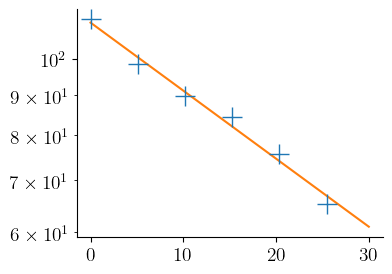

In [13]:
al_thickness, al_counts, al_times = np.loadtxt("../data/counts_cs137_alu.csv",skiprows=1, unpack=True, delimiter=',')
al_rates = al_counts / al_times
al_rates_sigma = al_rates * (ERROR_ATTENUATION_COUNT / al_counts + ERROR_TIME / al_times)

# TODO: put errors
plt.errorbar(al_thickness, al_rates, ls='', marker='+')

al_params, al_cov = np.polyfit(al_thickness, np.log(al_rates),1, cov=True)
print(f"Attenuation coefficient pour alu: {al_params[0]:2f}, {al_params[1]:2f}")
x = np.linspace(0,30,50)
plt.plot(x, np.exp(al_params[0]*x)*np.exp(al_params[1]))

plt.yscale('log')
plt.savefig('../figures/attenuation_cs137_alu.pdf')

Attenuation coefficient pour plomb: -0.082097, 4.623603


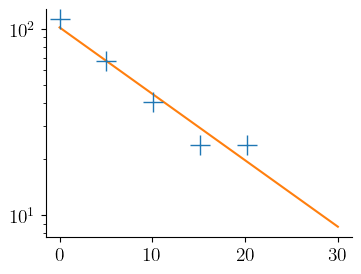

In [15]:
pb_thickness, pb_counts, pb_times = np.loadtxt("../data/counts_cs137_pb.csv",skiprows=1, unpack=True, delimiter=',')
pb_rates = pb_counts / pb_times
pb_rates_sigma = pb_rates * (ERROR_ATTENUATION_COUNT / pb_counts + ERROR_TIME / pb_times)

# TODO: put errors
plt.errorbar(pb_thickness, pb_rates, ls='', marker='+')

pb_params, pb_cov = np.polyfit(pb_thickness, np.log(pb_rates),1, cov=True)
print(f"Attenuation coefficient pour plomb: {pb_params[0]:2f}, {pb_params[1]:2f}")
x = np.linspace(0,30,50)
plt.plot(x, np.exp(pb_params[0]*x)*np.exp(pb_params[1]))

plt.yscale('log')
plt.savefig('../figures/attenuation_cs137_pb.pdf')